# Info
Name:  

    ## insert name here

Purpose:  

    ## add description
  
Input:

    ## inputs
  
Output:

    ##variables, figures and save files...
  
Keywords:

    none
  
Dependencies:

    - load_utils.py : for loading OMI HDF5 files
    - matplotlib
    - numpy
  
Needed Files:

  - file.rc : for consistent creation of look of matplotlib figures
  - ...
  
Modification History:

    Written: Samuel LeBlanc, Santa Cruz, CA, 2019-05-18
    Modified: 

# Prepare python environment

In [1]:
%config InlineBackend.rc = {}
import matplotlib 
import os
matplotlib.rc_file(os.path.join(os.getcwd(),'file.rc'))
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import Sp_parameters as Sp
from load_utils import mat2py_time, toutc, load_ict
import load_utils as lu
import plotting_utils as pu
from path_utils import getpath
import hdf5storage as hs
from datetime import datetime
from scipy.interpolate import UnivariateSpline
import matplotlib.dates as mdates
from mpl_toolkits.basemap import Basemap
import scipy.stats as st

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
%matplotlib notebook

In [6]:
fp = getpath('musstar')

Return path named:  musstar /mnt/c/Users/sleblanc/Research/muSSTAR/


In [4]:
import pandas as pd

# Load files for the Darks

In [7]:
f = fp+'spectro_testdata/C11482GA_Data/'

In [33]:
fs = os.listdir(f)

In [49]:
d = []
s = []
for ff in fs:
    print ff
    dat = pd.read_csv(f+ff,header=21)
    d.append(dat)
    try:
        sp = np.array([dat['{}'.format(i+1)][1:] for i in xrange(len(dat.keys())-4)])
    except:
        sp = np.array([np.nan, np.nan])
    
    s.append(sp)
    

File1.csv
File2_HiGain_50msec.csv
File2_LoGain_50msec.csv
File2_LoGain_5msec.csv
File3_HiGain_50msec.csv
File3_LoGain_50msec.csv
File3_LoGain_5msec.csv
File4_HiGain_50msec.csv
File4_LoGain_50msec.csv
File4_LoGain_5msec.csv
File_HiGain_50msec.csv
File_LoGain_50msec.csv
File_LoGain_5msec.csv


In [51]:
s

[array([[2237., 2352., 2200., ..., 2344., 2171., 2339.],
        [2284., 2302., 2248., ..., 2312., 2232., 2315.],
        [2297., 2303., 2264., ..., 2313., 2234., 2326.],
        ...,
        [2292., 2300., 2269., ..., 2306., 2222., 2315.],
        [2301., 2311., 2252., ..., 2309., 2236., 2327.],
        [2298., 2305., 2252., ..., 2320., 2242., 2323.]]),
 array([[6694., 4848., 3086., ..., 2668., 3030., 5661.],
        [6704., 4841., 3078., ..., 2669., 3039., 5686.],
        [6727., 4846., 3127., ..., 2671., 3027., 5635.],
        ...,
        [6726., 4830., 3102., ..., 2639., 3052., 5691.],
        [6792., 4888., 3141., ..., 2681., 3083., 5751.],
        [6739., 4919., 3129., ..., 2662., 3029., 5702.]]),
 array([nan, nan]),
 array([[2313., 2322., 2267., ..., 2315., 2229., 2334.],
        [2304., 2317., 2267., ..., 2319., 2246., 2342.],
        [2316., 2331., 2274., ..., 2323., 2237., 2347.],
        ...,
        [2312., 2325., 2268., ..., 2333., 2232., 2332.],
        [2311., 2339., 22

In [38]:
dat.keys()

Index([u'Pixel', u'WaveLength', u'dark', u'ref', u'1', u'2', u'3', u'4', u'5',
       u'6',
       ...
       u'711', u'712', u'713', u'714', u'715', u'716', u'717', u'718', u'719',
       u'720'],
      dtype='object', length=724)

In [18]:
dat = pd.read_csv(f+'File_HiGain_50msec.csv',header=21)

In [19]:
dat

,Pixel,WaveLength,dark,ref,1,2,3,4,5,6,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000
0,Time,NaN,NaN,NaN,81.0,60.0,60.0,60.0,60.0,60.0,...,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0
1,1,882.516933,0.0,0.0,4389.0,4481.0,4478.0,4465.0,4474.0,4473.0,...,5519.0,5483.0,5501.0,5490.0,5496.0,5517.0,5500.0,5501.0,5485.0,5486.0
2,2,884.457235,0.0,0.0,3628.0,3601.0,3570.0,3581.0,3580.0,3597.0,...,4129.0,4174.0,4134.0,4133.0,4152.0,4151.0,4160.0,4228.0,4164.0,4166.0
3,3,886.395288,0.0,0.0,2615.0,2692.0,2680.0,2682.0,2685.0,2694.0,...,2849.0,2856.0,2867.0,2854.0,2855.0,2842.0,2842.0,2877.0,2866.0,2846.0
4,4,888.331112,0.0,0.0,3787.0,3767.0,3811.0,3769.0,3763.0,3777.0,...,4422.0,4409.0,4460.0,4445.0,4443.0,4399.0,4436.0,4455.0,4467.0,4439.0
5,5,890.264726,0.0,0.0,2365.0,2467.0,2469.0,2433.0,2463.0,2454.0,...,2527.0,2527.0,2528.0,2501.0,2505.0,2525.0,2544.0,2551.0,2542.0,2515.0
6,6,892.196150,0.0,0.0,3700.0,3670.0,3646.0,3663.0,3685.0,3694.0,...,4320.0,4302.0,4322.0,4332.0,4343.0,4284.0,4332.0,4308.0,4332.0,4346.0
7,7,894.125402,0.0,0.0,2600.0,2660.0,2647.0,2667.0,2653.0,2684.0,...,2793.0,2803.0,2831.0,2829.0,2818.0,2799.0,2808.0,2831.0,2829.0,2832.0
8,8,896.052502,0.0,0.0,3852.0,3821.0,3831.0,3847.0,3811.0,3806.0,...,4502.0,4493.0,4496.0,4500.0,4544.0,4479.0,4494.0,4512.0,4517.0,4510.0
9,9,897.977469,0.0,0.0,2572.0,2576.0,2594.0,2605.0,2561.0,2602.0,...,2745.0,2731.0,2744.0,2745.0,2737.0,2716.0,2718.0,2714.0,2747.0,2719.0


<IPython.core.display.Javascript object>


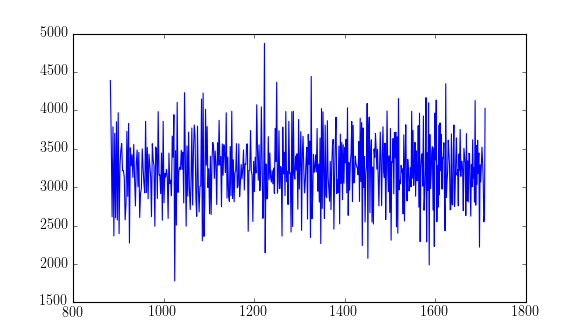

In [24]:
plt.figure()
plt.plot(dat['WaveLength'][1:],dat['1'][1:])

In [26]:
sp = np.array([dat['{}'.format(i+1)][1:] for i in xrange(5000)])

In [29]:
dat['WaveLength'][200]

1239.93003662672

In [58]:
ff.replace('_','\_')

u'File\\_LoGain\\_5msec.csv'

<IPython.core.display.Javascript object>


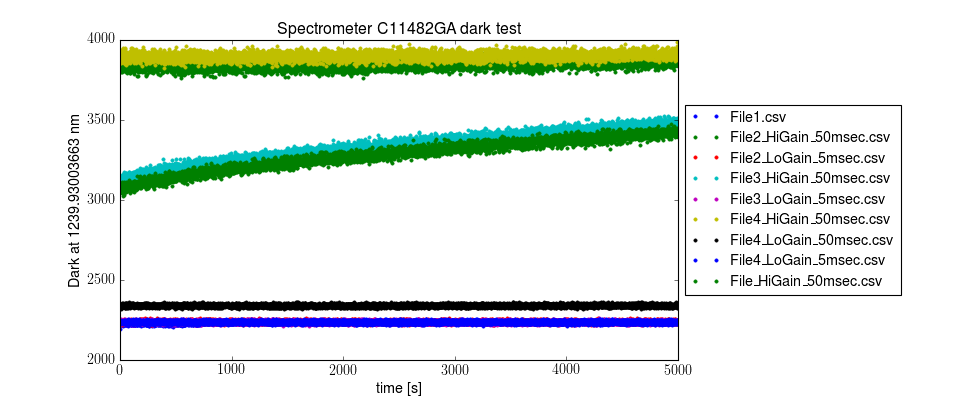

In [73]:
w = 200
plt.figure(figsize=(12,5))
for i,ss in enumerate(s):
    try:
        plt.plot(ss[:,w],'.',label=fs[i].replace('_','\_'))
    except:
        pass
plt.xlabel('time [s]')
plt.ylabel('Dark at {} nm'.format(dat['WaveLength'][w]))
plt.title('Spectrometer C11482GA dark test')
box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.75, box.height])
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))
plt.savefig(f+'Darks_1240nm.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


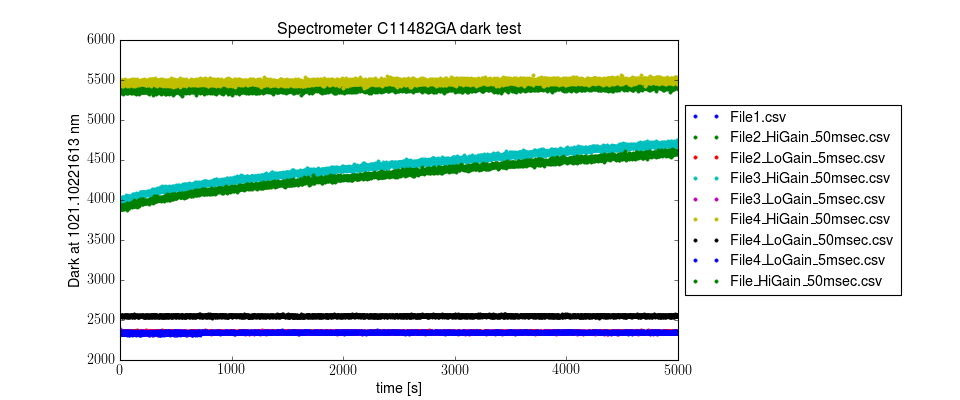

In [77]:
w = 75
plt.figure(figsize=(12,5))
for i,ss in enumerate(s):
    try:
        plt.plot(ss[:,w],'.',label=fs[i].replace('_','\_'))
    except:
        pass
plt.xlabel('time [s]')
plt.ylabel('Dark at {} nm'.format(dat['WaveLength'][w]))
plt.title('Spectrometer C11482GA dark test')
box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.75, box.height])
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))
plt.savefig(f+'Darks_1020nm.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


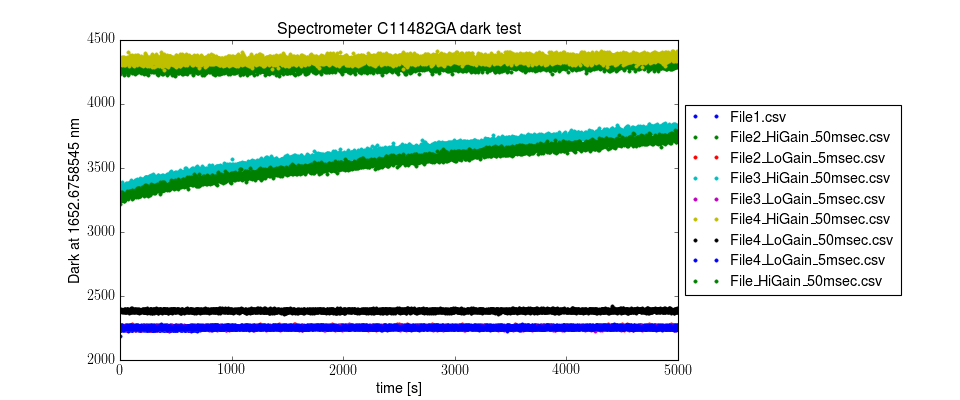

In [80]:
w = 470
plt.figure(figsize=(12,5))
for i,ss in enumerate(s):
    try:
        plt.plot(ss[:,w],'.',label=fs[i].replace('_','\_'))
    except:
        pass
plt.xlabel('time [s]')
plt.ylabel('Dark at {} nm'.format(dat['WaveLength'][w]))
plt.title('Spectrometer C11482GA dark test')
box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.75, box.height])
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))
plt.savefig(f+'Darks_1650nm.png',dpi=600,transparent=True)

In [107]:
fs

[u'File1.csv',
 u'File2_HiGain_50msec.csv',
 u'File2_LoGain_50msec.csv',
 u'File2_LoGain_5msec.csv',
 u'File3_HiGain_50msec.csv',
 u'File3_LoGain_50msec.csv',
 u'File3_LoGain_5msec.csv',
 u'File4_HiGain_50msec.csv',
 u'File4_LoGain_50msec.csv',
 u'File4_LoGain_5msec.csv',
 u'File_HiGain_50msec.csv',
 u'File_LoGain_50msec.csv',
 u'File_LoGain_5msec.csv']

# Load files for the direct beam

In [81]:
fd = fp+'spectro_testdata/Hamamatsu_Data/'

In [82]:
ffd = os.listdir(fd)

In [83]:
ffd

[u'HamaSpec_Gershun.csv',
 u'HamaSpec_Gershun_HG_1000.csv',
 u'HamaSpec_Gershun_HG_3000.csv',
 u'HamaSpec_Gershun_LG_10000.csv',
 u'HamaSpec_Gershun_LG_50000.csv',
 u'HamaSpec_Gershun_LG_50000_300.csv']

In [84]:
dd = []
sd = []
for ff in ffd:
    print ff
    dat = pd.read_csv(fd+ff,header=21)
    dd.append(dat)
    try:
        sp = np.array([dat['{}'.format(i+1)][1:] for i in xrange(len(dat.keys())-4)])
    except:
        sp = np.array([np.nan, np.nan])
    
    sd.append(sp)
    

HamaSpec_Gershun.csv
HamaSpec_Gershun_HG_1000.csv
HamaSpec_Gershun_HG_3000.csv
HamaSpec_Gershun_LG_10000.csv
HamaSpec_Gershun_LG_50000.csv
HamaSpec_Gershun_LG_50000_300.csv


<IPython.core.display.Javascript object>


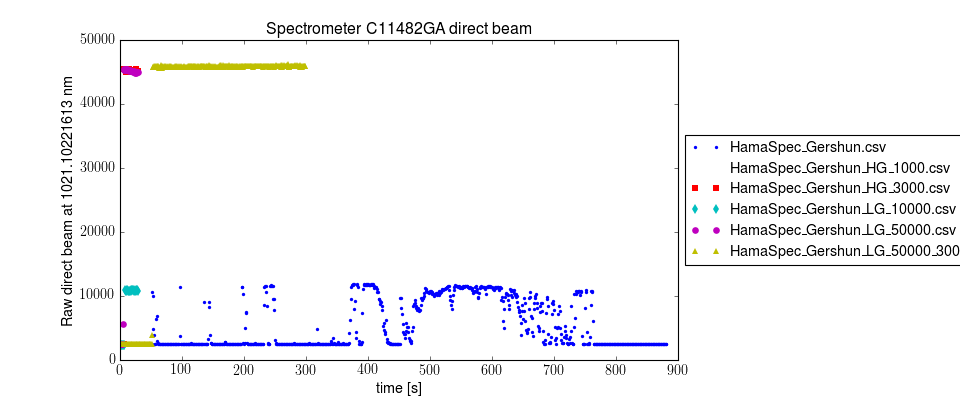

In [166]:
w = 75
plt.figure(figsize=(12,5))
mk = '.xsdo^+'
for i,ss in enumerate(sd):
    try:
        plt.plot(ss[:,w],mk[i],label=ffd[i].replace('_','\_'),markeredgecolor='None')
    except:
        pass
plt.xlabel('time [s]')
plt.ylabel('Raw direct beam at {} nm'.format(dat['WaveLength'][w]))
plt.title('Spectrometer C11482GA direct beam')
box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.75, box.height])
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))
plt.savefig(fd+'Direct_beam_1020nm.png',dpi=600,transparent=True)

In [108]:
s[7]

array([[6847., 4945., 3103., ..., 2692., 3051., 5778.],
       [6838., 4912., 3132., ..., 2665., 3089., 5749.],
       [6852., 4960., 3120., ..., 2655., 3065., 5743.],
       ...,
       [6891., 4938., 3118., ..., 2651., 3052., 5800.],
       [6891., 4971., 3129., ..., 2657., 3089., 5802.],
       [6896., 4925., 3125., ..., 2657., 3085., 5790.]])

In [109]:
np.nanstd(s[7],axis=0).shape

(512,)

<IPython.core.display.Javascript object>


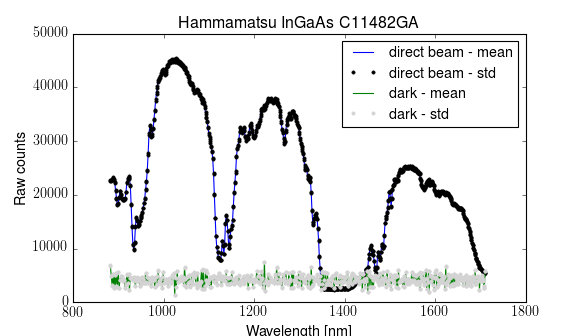

In [115]:
plt.figure()
plt.plot(dat['WaveLength'][1:],np.nanmean(sd[4][6:,:],axis=0),'-',label='direct beam - mean')
plt.plot(dat['WaveLength'][1:],np.nanmean(sd[4][6:,:],axis=0)+np.nanstd(sd[4][6:,:],axis=0),'.k',label='direct beam - std')
plt.plot(dat['WaveLength'][1:],np.nanmean(sd[4][6:,:],axis=0)-np.nanstd(sd[4][6:,:],axis=0),'.k')
plt.plot(dat['WaveLength'][1:],np.nanmean(s[7],axis=0),'-',label='dark - mean')
plt.plot(dat['WaveLength'][1:],np.nanmean(s[7],axis=0)+np.nanstd(s[7],axis=0),'.',color='lightgrey',label='dark - std')
plt.plot(dat['WaveLength'][1:],np.nanmean(s[7],axis=0)-np.nanstd(s[7],axis=0),'.',color='lightgrey')
plt.legend()
plt.xlabel('Wavelength [nm]')
plt.ylabel('Raw counts')
plt.title('Hammamatsu InGaAs C11482GA')
plt.savefig(fd+'raw_spectra_dir_darks.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


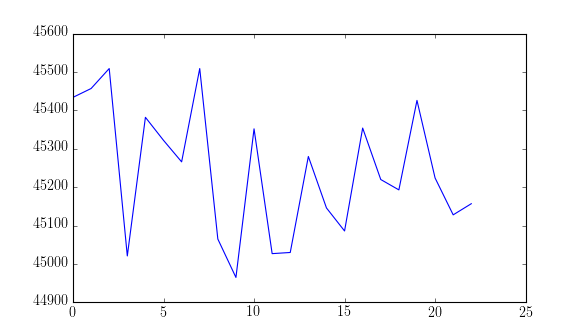

In [158]:
plt.figure()
plt.plot(sd[2][7:,75])

<IPython.core.display.Javascript object>


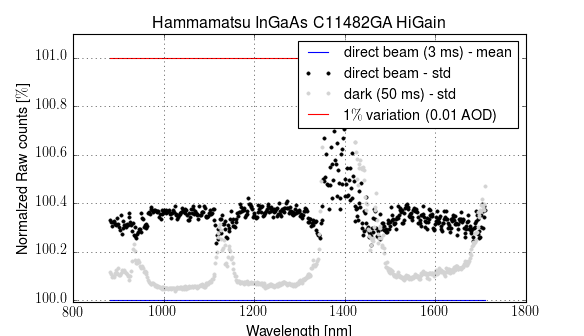

In [164]:
plt.figure()
nm = np.nanmean(sd[2][7:,:],axis=0)
plt.plot(dat['WaveLength'][1:],np.nanmean(sd[2][7:,:],axis=0)/nm*100.0,'-',label='direct beam (3 ms) - mean')
plt.plot(dat['WaveLength'][1:],(np.nanmean(sd[2][7:,:],axis=0)+np.nanstd(sd[2][7:,:],axis=0))/nm*100.0,'.k',label='direct beam - std')
plt.plot(dat['WaveLength'][1:],(np.nanmean(sd[2][7:,:],axis=0)-np.nanstd(sd[2][7:,:],axis=0))/nm*100.0,'.k')
#plt.plot(dat['WaveLength'][1:],np.nanmean(s[7],axis=0),'-',label='dark - mean')
plt.plot(dat['WaveLength'][1:],(nm+np.nanstd(s[7],axis=0))/nm*100.0,'.',color='lightgrey',label='dark (50 ms) - std')
plt.plot(dat['WaveLength'][1:],(nm-np.nanstd(s[7],axis=0))/nm*100.0,'.',color='lightgrey')
plt.plot(dat['WaveLength'][1:],nm*101.0/nm,'-',color='red',label='1$\%$ variation (0.01 AOD)')
plt.plot(dat['WaveLength'][1:],nm*99.0/nm,'-',color='red')
plt.ylim(99.99,101.1)
plt.grid()
plt.legend()
plt.xlabel('Wavelength [nm]')
plt.ylabel('Normalzed Raw counts [$\\%$]')
plt.title('Hammamatsu InGaAs C11482GA HiGain')
plt.savefig(fd+'raw_spectra_dir_darks_nomralized_hi50.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


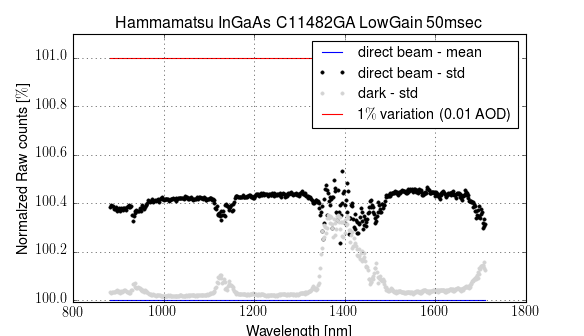

In [165]:
plt.figure()
nm = np.nanmean(sd[4][6:,:],axis=0)
plt.plot(dat['WaveLength'][1:],np.nanmean(sd[4][6:,:],axis=0)/nm*100.0,'-',label='direct beam - mean')
plt.plot(dat['WaveLength'][1:],(np.nanmean(sd[4][6:,:],axis=0)+np.nanstd(sd[4][6:,:],axis=0))/nm*100.0,'.k',label='direct beam - std')
plt.plot(dat['WaveLength'][1:],(np.nanmean(sd[4][6:,:],axis=0)-np.nanstd(sd[4][6:,:],axis=0))/nm*100.0,'.k')
#plt.plot(dat['WaveLength'][1:],np.nanmean(s[7],axis=0),'-',label='dark - mean')
plt.plot(dat['WaveLength'][1:],(nm++np.nanstd(s[8],axis=0))/nm*100.0,'.',color='lightgrey',label='dark - std')
plt.plot(dat['WaveLength'][1:],(nm-np.nanstd(s[8],axis=0))/nm*100.0,'.',color='lightgrey')
plt.plot(dat['WaveLength'][1:],nm*101.0/nm,'-',color='red',label='1$\%$ variation (0.01 AOD)')
plt.plot(dat['WaveLength'][1:],nm*99.0/nm,'-',color='red')
plt.ylim(99.99,101.1)
plt.grid()
plt.legend()
plt.xlabel('Wavelength [nm]')
plt.ylabel('Normalzed Raw counts [$\\%$]')
plt.title('Hammamatsu InGaAs C11482GA LowGain 50msec')
plt.savefig(fd+'raw_spectra_dir_darks_nomralized_lo50.png',dpi=600,transparent=True)

In [153]:
fs[7]

u'File4_HiGain_50msec.csv'

In [126]:
ffd[4]

u'HamaSpec_Gershun_LG_50000.csv'

In [127]:
ffd[2]

u'HamaSpec_Gershun_HG_3000.csv'

In [147]:
fs[8]

u'File4_LoGain_50msec.csv'

# Plotting
Present some fo the early plots here